#**1. Perfilamiento de Datos**

In [19]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# carga de datos
data= pd.read_csv('Heart_Disease_Prediction.csv')
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [22]:
!pip install ydata-profiling

In [5]:
from ydata_profiling import ProfileReport

profile_data=ProfileReport(data, minimal=False)
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 49.96it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file="Heart_Disease_Prediction.csv")

/usr/local/lib/python3.12/dist-packages/ydata_profiling/profile_report.py:386: UserWarning: Extension .csv not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#**2. Dimensiones de calidad de datos**

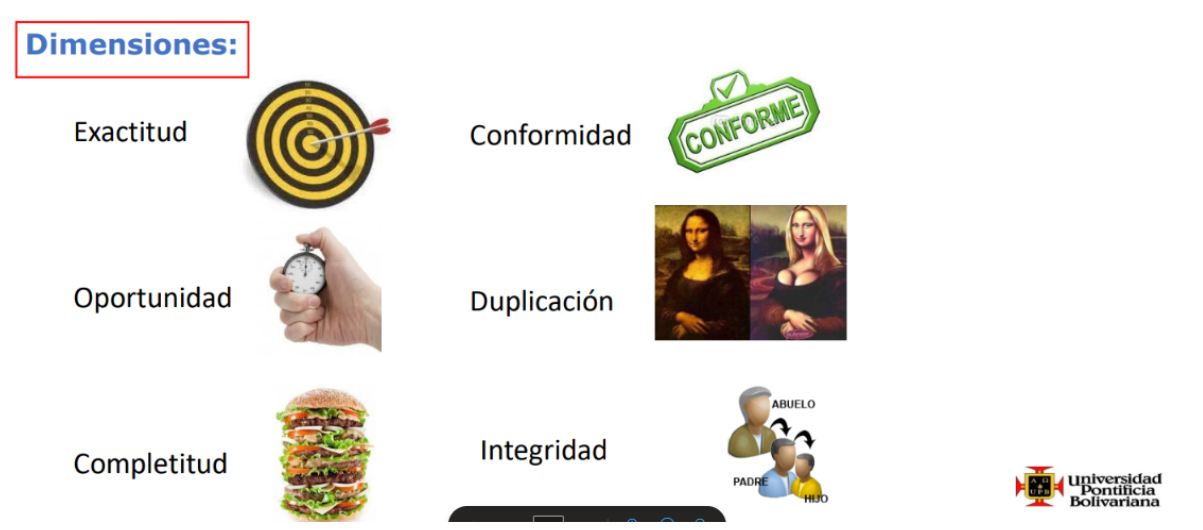

Completitud: Datos faltantes o ausentes.

Exactitud: Atipicos (outliers).

Conformidad: Problemas con formatos de los datos.

Oportunidad: Los datos no se los entregan segun la necesidad de periocidad.

Duplicidad: Registros duplicados

Integridad: Faltan datos relacionados que son importantes

# **Diagnóstico de las dimensiones según el perfilado:**
1. Completitud: En dataset, no se hallan datos ausentes o nulos en ninguna de las variables.

2. Exactitud: Luego de un análisis de cada una de las variables a través del formato de HTML y de acuerdo con el rango de valores de las variables categóricas, no se detectaron datos fuera de rango (outliers). [link text](https://)Sin embargo, podemos identificar en el formato HTML que hay algunas variables de si bien son numeros, podrian reconocerse mejor como categoricas. Estas variables son: Sex, Chest pain type, FBS over 120, EKG results, Exercise angina, Slope of ST, Number of vessels fluro, Thallium.

3. Conformidad: Si bien muchas de las esacalas de los campos del data set salen de mi conocimiento, los datos parecen ser conformes con lo que se busca medir y estan correctamente definidos

4. Oportunidad: Los datos son correctamente leibles e interpretables

5. Duplicidad: No se encuentran registros duplicados

6. Integridad: Las relaciones entre los campos es integra y coherente.

# **3. Resumen y acciones necesarias (Implementación de pasos de limpieza de datos)**

De acuerdo con el diagnostico realizado no se encontraron datos nulos, atipicos, variables irrelevantes, etc.

Es necesario modificar las variables que con ayuda del HTML fueron identificadas como categoricas.

Por otro lado revisando la matriz de correlacion generada por el formato HTML, se lograron identificar algunas variables que resultan ser irrelevantes para la prediccion de Heart Disease. Por lo tanto estas variables seran eliminadas como parte del proceso de preparacion de datos. Las variables a eliminar son: BP and FBS over 120

In [23]:
# Pasamos variables numericas a categoricas segun necesario.
data['Sex']=data['Sex'].astype('category')
data['Chest pain type']=data['Chest pain type'].astype('category')
data['FBS over 120']=data['FBS over 120'].astype('category')
data['EKG results']=data['EKG results'].astype('category')
data['Exercise angina']=data['Exercise angina'].astype('category')
data['Slope of ST']=data['Slope of ST'].astype('category')
data['Number of vessels fluro']=data['Number of vessels fluro'].astype('category')
data['Thallium']=data['Thallium'].astype('category')
data['Heart Disease']=data['Heart Disease'].astype('category')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      270 non-null    int64   
 1   Sex                      270 non-null    category
 2   Chest pain type          270 non-null    category
 3   BP                       270 non-null    int64   
 4   Cholesterol              270 non-null    int64   
 5   FBS over 120             270 non-null    category
 6   EKG results              270 non-null    category
 7   Max HR                   270 non-null    int64   
 8   Exercise angina          270 non-null    category
 9   ST depression            270 non-null    float64 
 10  Slope of ST              270 non-null    category
 11  Number of vessels fluro  270 non-null    category
 12  Thallium                 270 non-null    category
 13  Heart Disease            270 non-null    category
dtypes: categor

In [25]:
data_preparada = data.drop(['BP', 'FBS over 120'], axis=1)
data_preparada.head()

,Age,Sex,Chest pain type,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,322,2,109,0,2.4,2,3,3,Presence
1,67,0,3,564,2,160,0,1.6,2,0,7,Absence
2,57,1,2,261,0,141,0,0.3,1,0,7,Presence
3,64,1,4,263,0,105,1,0.2,2,1,7,Absence
4,74,0,2,269,2,121,1,0.2,1,1,3,Absence


In [26]:
data_preparada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      270 non-null    int64   
 1   Sex                      270 non-null    category
 2   Chest pain type          270 non-null    category
 3   Cholesterol              270 non-null    int64   
 4   EKG results              270 non-null    category
 5   Max HR                   270 non-null    int64   
 6   Exercise angina          270 non-null    category
 7   ST depression            270 non-null    float64 
 8   Slope of ST              270 non-null    category
 9   Number of vessels fluro  270 non-null    category
 10  Thallium                 270 non-null    category
 11  Heart Disease            270 non-null    category
dtypes: category(8), float64(1), int64(3)
memory usage: 11.8 KB


In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# Copia del dataset original
df = data_preparada.copy()

# Separar variables numéricas y categóricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['category']).columns.tolist()

# Columnas que deben tener drop_first=True
drop_first_cols = ['Sex', 'Exercise angina', 'Heart Disease']

# --- OneHotEncoding con control de drop_first ---
encoded_dfs = []

for col in cat_cols:
    encoder = OneHotEncoder(drop='first' if col in drop_first_cols else None, sparse_output=False)
    transformed = encoder.fit_transform(df[[col]])
    encoded_df = pd.DataFrame(transformed, columns=encoder.get_feature_names_out([col]))
    encoded_dfs.append(encoded_df)

# Concatenar todas las columnas codificadas
encoded_cat = pd.concat(encoded_dfs, axis=1)

# Escalar variables numéricas
scaler = StandardScaler()
scaled_num = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

# Unir numéricas y categóricas codificadas
datos_numericos = pd.concat([scaled_num, encoded_cat], axis=1)

# Creamos csv de datos numericos
datos_numericos.to_csv('./Heart_Disease_Prediction_NUMERICOS.csv')

# Verificar resultado
print(datos_numericos.info())

datos_numericos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        270 non-null    float64
 1   Cholesterol                270 non-null    float64
 2   Max HR                     270 non-null    float64
 3   ST depression              270 non-null    float64
 4   Sex_1                      270 non-null    float64
 5   Chest pain type_1          270 non-null    float64
 6   Chest pain type_2          270 non-null    float64
 7   Chest pain type_3          270 non-null    float64
 8   Chest pain type_4          270 non-null    float64
 9   EKG results_0              270 non-null    float64
 10  EKG results_1              270 non-null    float64
 11  EKG results_2              270 non-null    float64
 12  Exercise angina_1          270 non-null    float64
 13  Slope of ST_1              270 non-null    float64

,Age,Cholesterol,Max HR,ST depression,Sex_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,EKG results_0,...,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7,Heart Disease_Presence
0,1.712094,1.402212,-1.759208,1.181012,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.382140,6.093004,0.446409,0.481153,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.282294,0.219823,-0.375291,-0.656118,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.052186,0.258589,-1.932198,-0.743600,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.152032,0.374890,-1.240239,-0.743600,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


<Axes: >

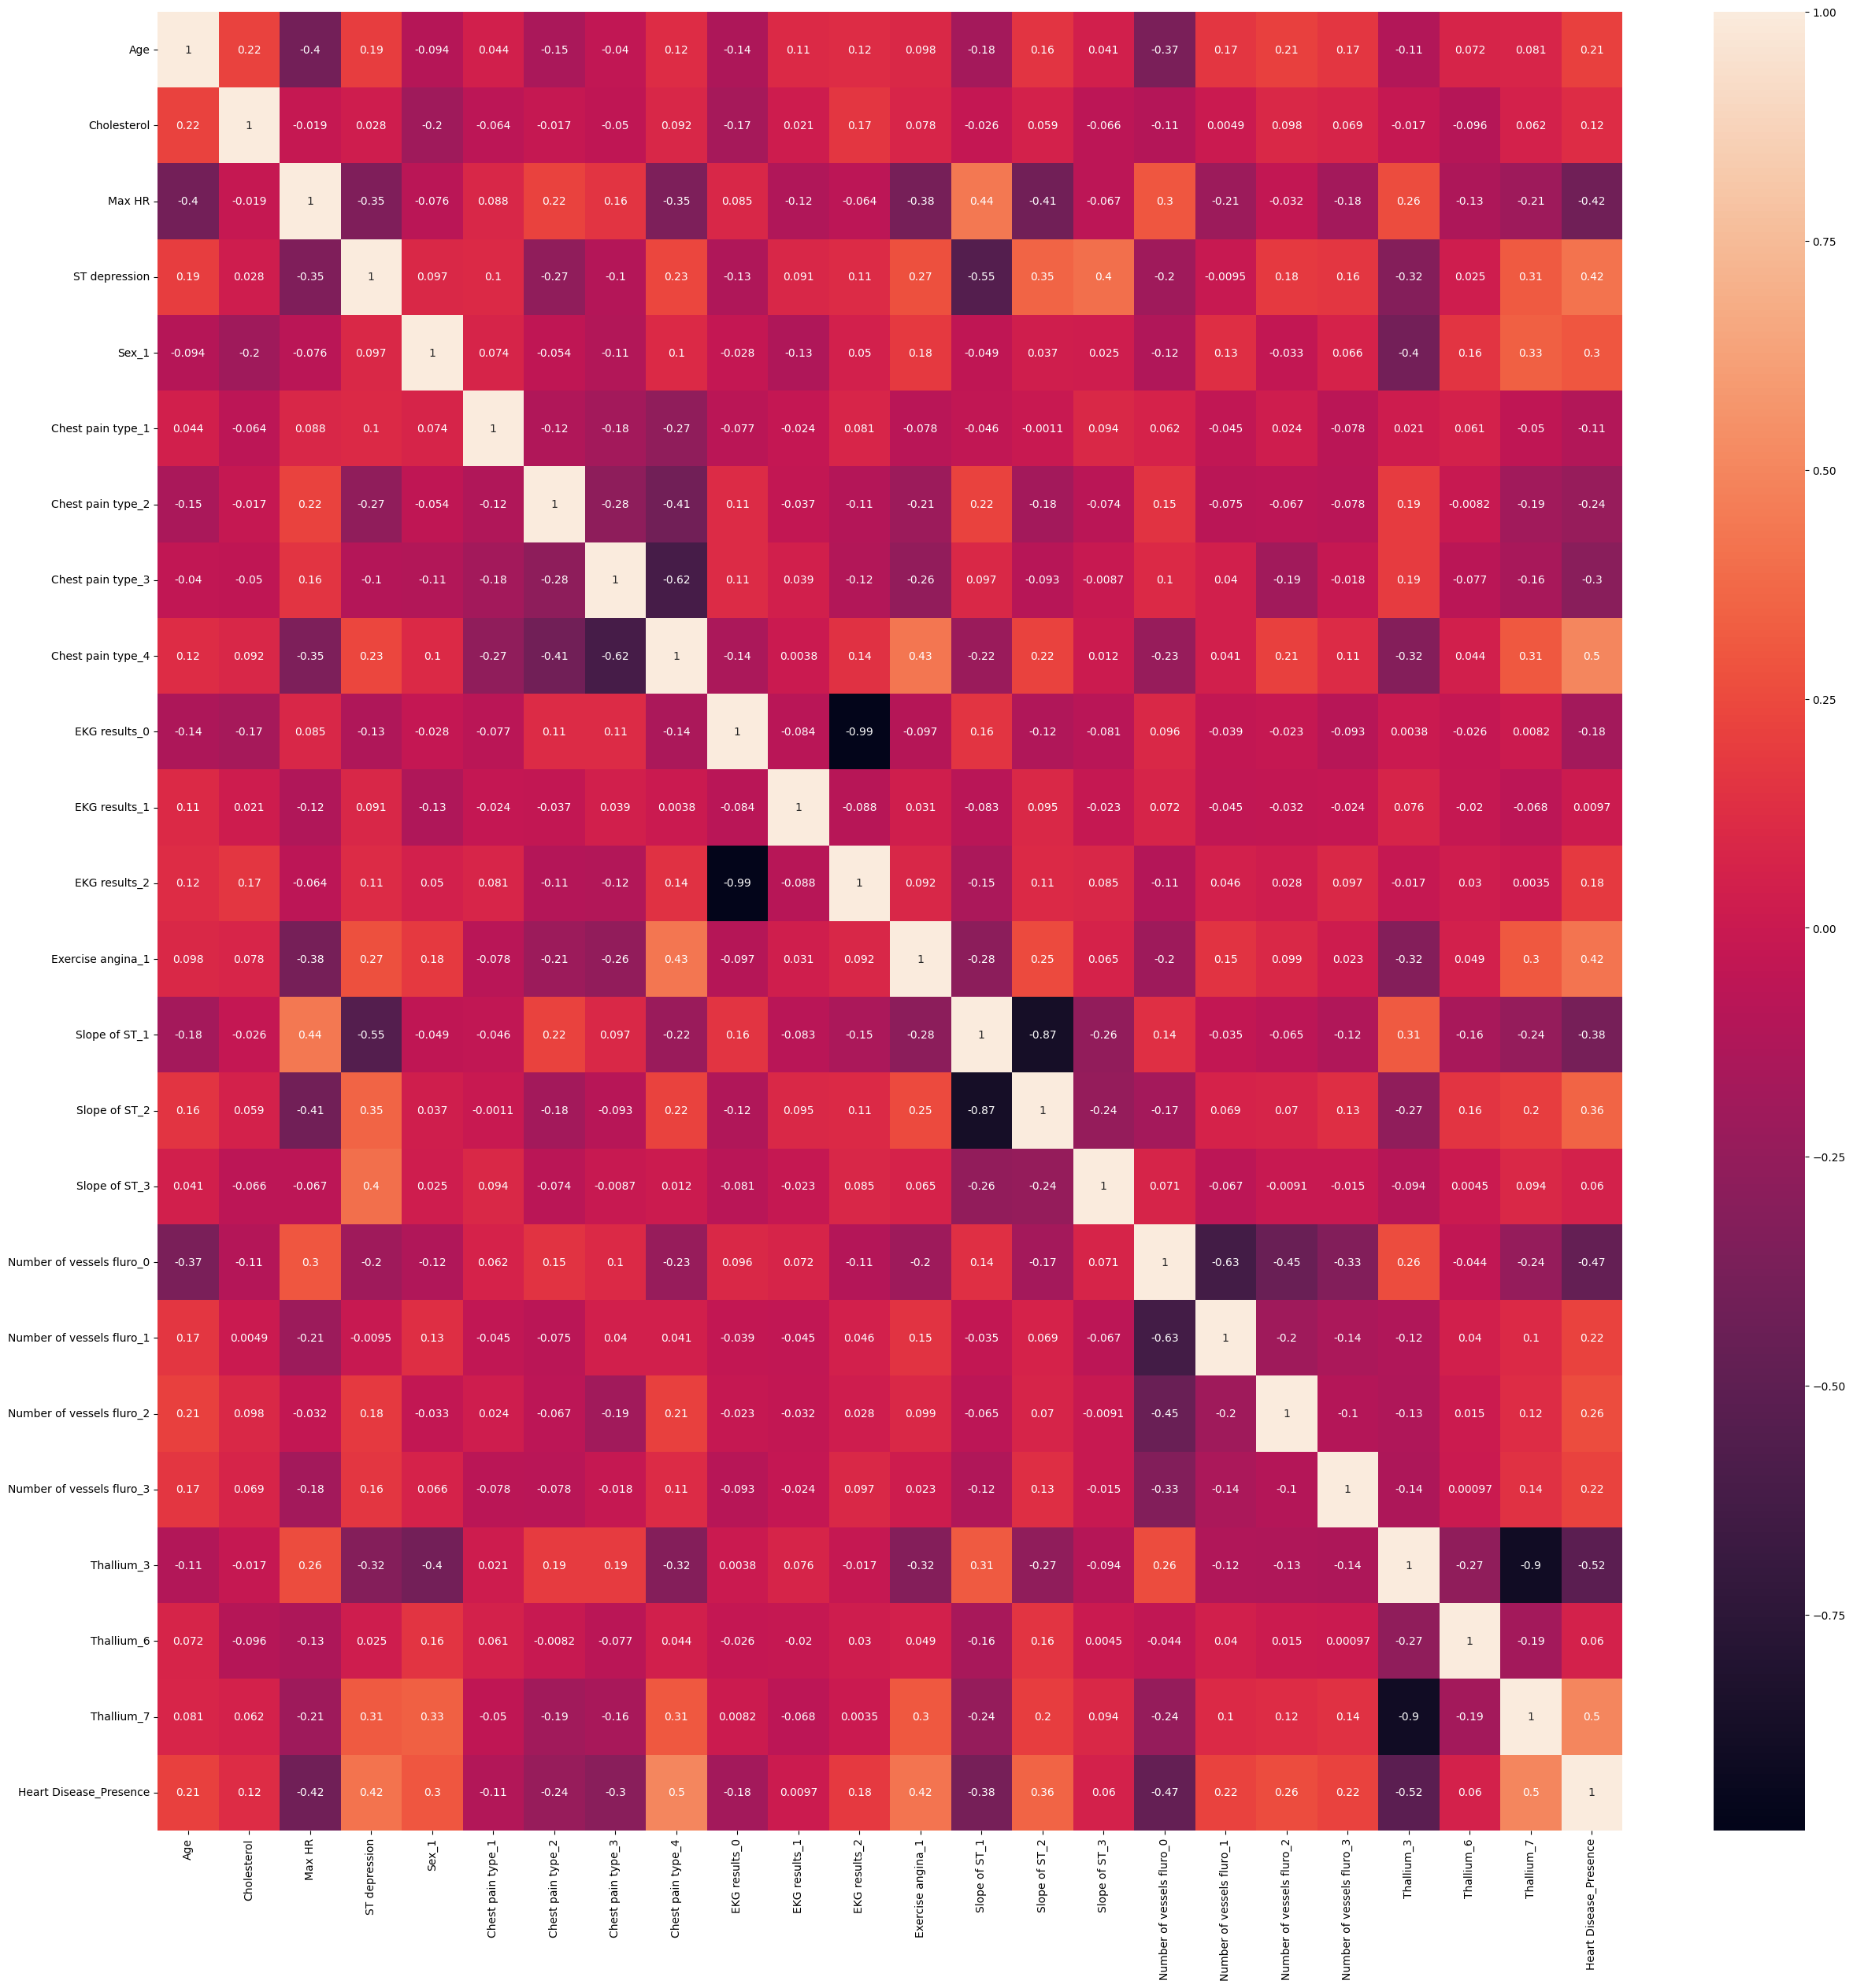

In [28]:
import seaborn as sns
plt.figure(figsize=(30,30))
sns.heatmap(datos_numericos.corr(),annot=True)

In [29]:
import pandas as pd

# Copia del dataset original
df = data_preparada.copy()

# Columnas que deben tener drop_first=True
drop_first_cols = ['Sex', 'Exercise angina', 'Heart Disease']

# Aplicar get_dummies (similar a OneHotEncoder pero más simple)
datos_categoricos = pd.get_dummies(
    df,
    drop_first=False,  # Por defecto no elimina la primera categoría
    dtype=int
)

# Eliminar manualmente la primera categoría solo de las variables especificadas
for col in drop_first_cols:
    col_prefix = f"{col}_"
    cols = [c for c in datos_categoricos.columns if c.startswith(col_prefix)]
    if len(cols) > 1:  # Solo si tiene más de una categoría
        datos_categoricos.drop(cols[0], axis=1, inplace=True)

# Verificar resultado
print(datos_categoricos.info())

datos_categoricos.to_csv('./Heart_Disease_Prediction_CATEGORICOS.csv')

datos_categoricos.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        270 non-null    int64  
 1   Cholesterol                270 non-null    int64  
 2   Max HR                     270 non-null    int64  
 3   ST depression              270 non-null    float64
 4   Sex_1                      270 non-null    int64  
 5   Chest pain type_1          270 non-null    int64  
 6   Chest pain type_2          270 non-null    int64  
 7   Chest pain type_3          270 non-null    int64  
 8   Chest pain type_4          270 non-null    int64  
 9   EKG results_0              270 non-null    int64  
 10  EKG results_1              270 non-null    int64  
 11  EKG results_2              270 non-null    int64  
 12  Exercise angina_1          270 non-null    int64  
 13  Slope of ST_1              270 non-null    int64  

,Age,Cholesterol,Max HR,ST depression,Sex_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,EKG results_0,...,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7,Heart Disease_Presence
0,70,322,109,2.4,1,0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,1
1,67,564,160,1.6,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
2,57,261,141,0.3,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1
3,64,263,105,0.2,1,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
4,74,269,121,0.2,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [30]:
#Guardar datos preparados
data_preparada.to_csv('./Heart_Disease_Predictio_READY.csv')